# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [16]:
!git clone https://github.com/AbdelrhmanElsaied/ml-1
%cd  ml-1/linear_regression

c:\Users\Admin\Desktop\ml-1\ml-1\linear_regression


Cloning into 'ml-1'...


In [17]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [18]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


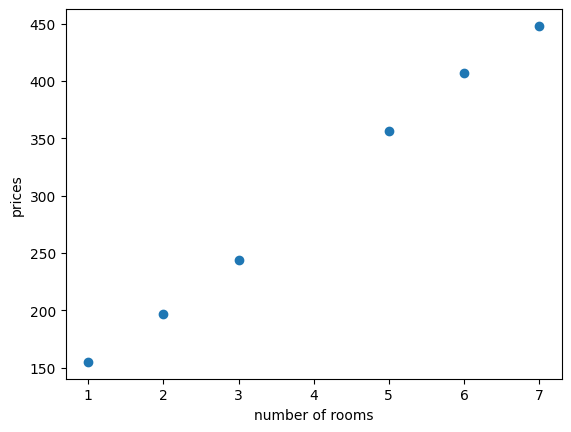

In [19]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [20]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room += small_random_1
        base_price -= small_random_2
    return price_per_room, base_price

In [21]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room * num_rooms
    error = price - predicted_price
    price_per_room += learning_rate * error * num_rooms
    base_price += learning_rate * error
    return price_per_room, base_price

In [22]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    # Calculate the predicted price using the current parameters
    predicted_price = base_price + price_per_room * num_rooms

    # Calculate the absolute difference between the predicted and actual price
    error = price - predicted_price

    # Update the parameters using the Absolute Trick
    base_price = base_price + learning_rate * error
    price_per_room = price_per_room + learning_rate * error * num_rooms

    return price_per_room, base_price


### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

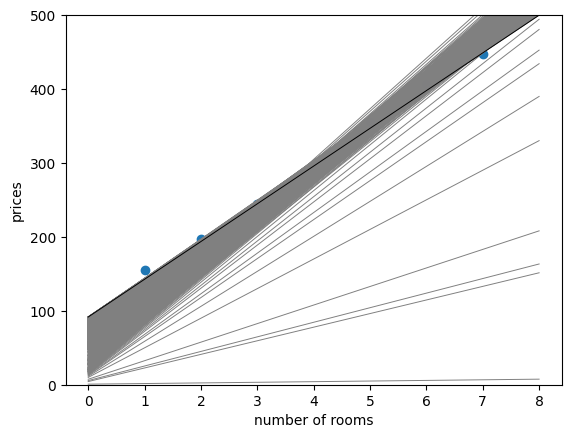

In [23]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for iter in range (epochs):
      if(True):
        utils.draw_line(price_per_room, base_price, starting=0, ending=8)
      x = rd.randint(0,len(features)-1)
      num_rooms = features[x]
      price = labels[x]

      price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate)


    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

### Root mean squared error function

In [26]:
# The root mean square error function
def rmse(labels, predictions):
    ## TODO ##
    # calculate the root meen square error between the labels and predictions
    # Convert inputs to numpy arrays to ensure compatibility
    labels = np.array(labels)
    predictions = np.array(predictions)

    # Calculate the squared errors
    squared_errors = (predictions - labels) ** 2

    # Calculate the mean squared error
    mean_squared_error = np.mean(squared_errors)

    # Calculate the root mean square error
    root_mean_square_error = np.sqrt(mean_squared_error)

    return root_mean_square_error

    return error

In [31]:
def gradient_descent(price_per_room, base_price, num_rooms, price, learning_rate):
    predicted_price = price_per_room * num_rooms + base_price
    
    # Calculate the error
    error = predicted_price - price
    
    # Update the parameters
    updated_price_per_room = price_per_room - learning_rate * (1 / num_rooms) * error * num_rooms
    updated_base_price = base_price - learning_rate * (1 / num_rooms) * error
    
    return updated_price_per_room, updated_base_price


### Plotting the error function

Price per room: 62.12705655715807
Base price: 60.94079069518703


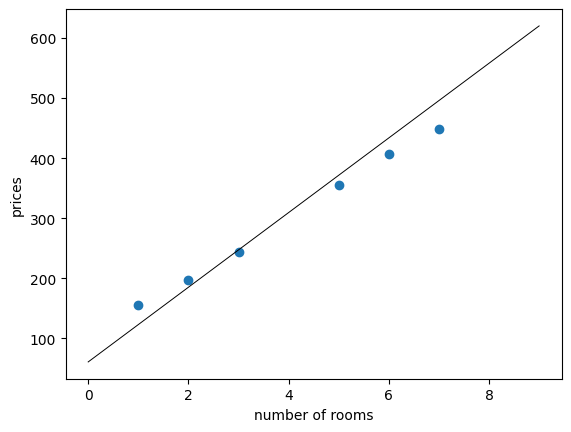

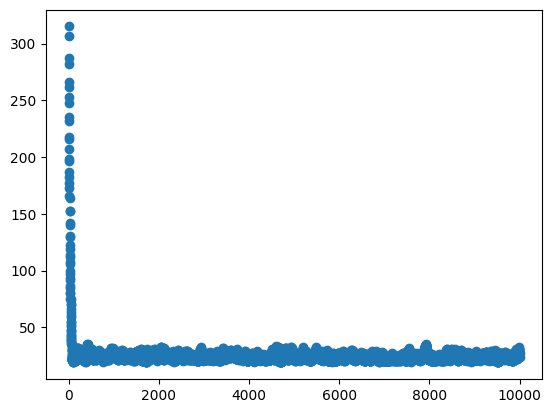

(62.12705655715807, 60.94079069518703)

In [32]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        #price_per_room, base_price = square_trick(base_price,
        price_per_room, base_price = gradient_descent(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [ ]:
## TODO ##
# Use sklearn to implement linear regression that fit our data (features, labels)


In [ ]:
## TODO ##
# print the coefficients and bias of this model


In [ ]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms


### Normal Equation



In [ ]:
def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features

    return W

W = Normal_Equation(features,labels)
print(W)

### Real Example (Predict fuel efficiency)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Get data

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

NameError: name 'pd' is not defined

In [ ]:
dataset = raw_dataset.copy()
dataset.head()

NameError: name 'raw_dataset' is not defined

#### Clean data

In [ ]:
dataset.isna().sum()

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

In [ ]:
dataset.head()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [ ]:
dataset.head()

In [ ]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

In [ ]:
datasetXsingle=dataset[['Horsepower']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [ ]:
# use single-variable input to fit linear regression model

In [ ]:
# use multi-variable input to fit linear regression model

In [ ]:
# use Normalized mlti-variable input to fit linear regression model